In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pylab as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline
%pdb

#导出HTML时，不输出代码
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) \
                { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>'
                , raw=True)

Automatic pdb calling has been turned ON


In [2]:
#导入数据
crash = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
crash = crash[['Date', 'Time', 'Location', 'Operator', 'Type', 'Aboard', 'Fatalities']]

## 数据清洗

In [3]:
#提取Nation
def get_loc(a):
    if pd.isnull(a):
        pass
    else:
        a = a.split(',')[-1].strip()
    return a

crash['Nation'] = crash['Location'].apply(get_loc)

#将标为美国州的字段修改为USA
state = pd.ExcelFile('state_list.xlsx')
state = state.parse('Sheet1')
stateList = state[state.columns[0]].iloc[2:]

#将stateList格式标准化，确保第二个单词为大写开头
def upper_first(a):
    a = a.strip()
    if ' ' in a:
        last = a.split(' ')[-1]
        last = last[0].upper() + last[1:]
        a = a.split(' ')[0] + ' ' + last
    return a

stateList = stateList.apply(upper_first)
crash.loc[crash['Nation'].isin(stateList), 'Nation'] = 'USA'

## 中国空难

* 我们先看一下中国的空难大致情况。可以发现中国空难数量在1940年代出现了巨幅的上升，而后又迅速下降。


* 而这个时间正值二战争期间。这期间发生空难的机型主要是C-47和C-53两种，这两型飞机是二战中，中国使用的最主要的两种军用运输机。这说明1940年代剧增的空难数的确是战争造成的。


* 在此期间共发生了41起空难，占到了中国的总空难数的48.4%。共有695人遇难，占到了总遇难人数的30.8%。

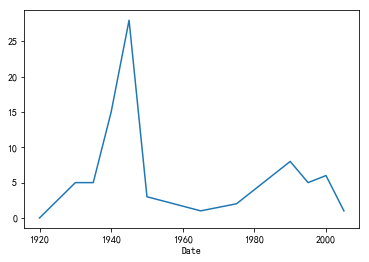

In [4]:
#筛选与中国相关的空难
china_crash = crash[crash['Location'].apply(lambda x: 'China' in str(x))]
#将时间以5年为单位归类
c_y_list = china_crash['Date'].apply(lambda a : a[-4:]).astype(int) // 5 * 5
china_crash.groupby(c_y_list)['Operator'].count().plot(kind='line')

In [5]:
print('\t1940年代\t1945年代\t总数\t比例')
print('空难数\t',end='')
print(len(china_crash[c_y_list.isin([1940])]),  end='\t')
print(len(china_crash[c_y_list.isin([1945])]), end='\t' )
print(len(china_crash), end='\t')
print('%.3f' %(len(china_crash[c_y_list.isin([1940, 1945])]) / (len(china_crash) + 0.0)) )

print('遇难人数\t',end='')
print(china_crash.loc[c_y_list.isin([1940]), 'Fatalities'].sum(), end='\t')
print(china_crash.loc[c_y_list.isin([1945]), 'Fatalities'].sum(), end='\t')
print(china_crash['Fatalities'].sum(), end='\t')
print('%.3f' %(china_crash.loc[c_y_list.isin([1940, 1945]), 'Fatalities'].sum() / china_crash['Fatalities'].sum()) )

	1940年代	1945年代	总数	比例
空难数	15	29	91	0.484
遇难人数	69.0	626.0	2260.0	0.308


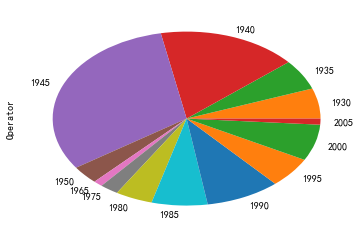

In [6]:
china_crash.groupby(c_y_list)['Operator'].count().plot(kind='pie')

## 世界空难

* 从全球范围来看，空难数量是一直呈增加趋势的，在70年代达到顶点，之后总体呈下降趋势。


* 在40年代中期，60年代末和80年代末都出现了空难的高峰。

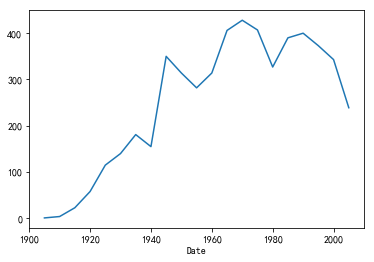

In [7]:
crash.groupby(crash['Date'].apply(lambda a : a[-4:])
              .astype(int) // 5*5)['Operator'].count().plot(kind='line')

## 美国空难

* 从发生空难的国家来看，在美国发生的空难数远超其他国家。占到了全球总空难数的25.9%。


* 但是全球的航空运输飞机总量大约为[23600架](www.telegraph.co.uk/travel/travel-truths/how-many-planes-are-there-in-the-world/)，而美国在2014年共有航空运输飞机[6676架](https://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/national_transportation_statistics/html/table_01_03.html)，美国约占全球的28.3%。这么来看，美国如此多的空难数也就是不足为奇了。



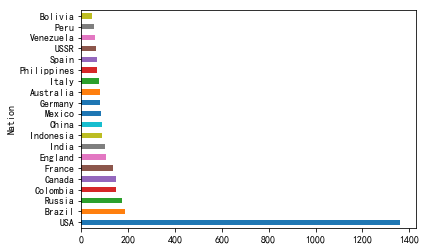

In [8]:
USA_crash = crash[crash['Nation'] == 'USA']
crash.groupby('Nation')['Operator'].count().sort_values(ascending=False)[:20].plot(kind='barh')

* 美国的空难数量多，但是因此死亡的人数并不多。一共有15550人因空难死亡，只占全球空难死亡总人数的14.7%。


* 在美国乘坐飞机，如果发生空难，死亡率是63.6%，比全球平均数73.0%低了十个百分点。

 
* 在美国发生空难的飞机中，平均载员数为17.9，而在全球范围内这个数字是27.4，美国比全球平均数要低34.7%。


* 发生空难后死亡率低和飞机载员数少这两个原因共同导致，美国虽然空难数多，但是相对来说死亡人数并不多。

In [9]:

print('\t空难数\t遇难人数\t\t死亡率\t平均载员')
print('美国\t',end='')
print(len(USA_crash), end='\t')
print(USA_crash['Fatalities'].sum(), end='\t\t')
print('%0.3f' %(USA_crash['Fatalities'].sum() / USA_crash['Aboard'].sum()), end='\t')
print('%0.1f' %(USA_crash['Aboard'].sum() / len(USA_crash)))

print('全球\t', end='')
print(len(crash), end='\t')
print(crash['Fatalities'].sum(), end='\t')
print('%0.3f' %(crash['Fatalities'].sum() / crash['Aboard'].sum()), end='\t')
print('%0.1f' %(crash['Aboard'].sum() / len(crash)))

	空难数	遇难人数		死亡率	平均载员
美国	1365	15550.0		0.636	17.9
全球	5268	105479.0	0.730	27.4


本来是试图分析空难死亡率的排名，但排名低的国家空难数也低，暂时无法找到有效且可信的剔除标准，故放弃此指标。

## 飞机所属公司（部门）

In [10]:
#crash.groupby('Operator')['Aboard', 'Fatalities'].sum()
a = crash.groupby('Operator')['Operator'].count()
b = crash.groupby('Operator')[['Aboard', 'Fatalities']].sum()
o_crash = pd.merge(DataFrame(a), b, left_index=True, right_index=True)

In [11]:
o_crash['rate'] = o_crash['Fatalities'] / o_crash['Aboard']

In [12]:
o_crash.sort_values('Operator', ascending=False)[:10]

,Operator,Aboard,Fatalities,rate
Operator,,,,
Aeroflot,179,8870.0,7156.0,0.806764
Military - U.S. Air Force,176,4502.0,3717.0,0.825633
Air France,70,2874.0,1734.0,0.603340
Deutsche Lufthansa,65,510.0,396.0,0.776471
United Air Lines,44,2460.0,1021.0,0.415041
Air Taxi,44,176.0,161.0,0.914773
China National Aviation Corporation,44,374.0,409.0,1.093583
Military - U.S. Army Air Forces,43,1100.0,1070.0,0.972727
Pan American World Airways,41,2812.0,1302.0,0.463016


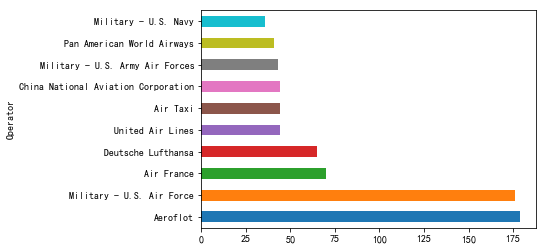

In [13]:
o_crash.sort_values('Operator', ascending=False).iloc[:10, 0].plot(kind='barh')

从飞机的归属来看，空难数最多的是俄罗斯国际航空公司(Aeroflot)，空难数达到了179起;其次是美国空军(U.S. Air Force),176起;排在第三的是法国航空(Air France),空难数为70起。

## 机型

* 从机型来看，空难数第一的是“道格拉斯DC-3型飞机”，其次是"德哈维兰加拿大DHC-6",再之后是"道格拉斯DC-47A",和“DC-47”。需要说明的是，DC-47实际上就是DC-3的军用型,二战结束之后，大量的DC-47转为民用，这时它们就又用回了DC-3这个型号。


* DC-3及其军用型的总空难数，在空难数前十的机型的空难之和中，占到了62.5%。

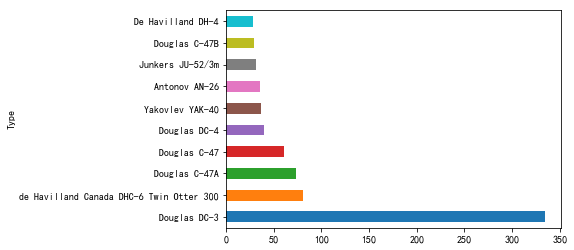

In [14]:
crash.groupby('Type')['Operator'].count().sort_values(ascending=False)[:10].plot(kind='barh')

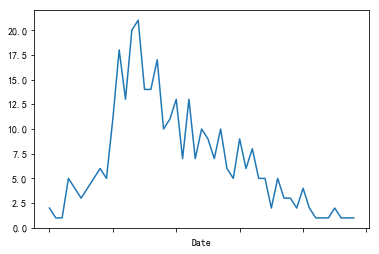

In [15]:
t_crash = crash[crash['Type'] == 'Douglas DC-3']
t_crash.groupby(t_crash['Date'].apply(lambda a : a[-4:]))['Operator'].count().plot()

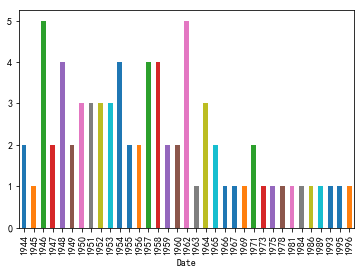

In [16]:
t_crash = crash[crash['Type'] == 'Douglas C-47A']
t_crash.groupby(t_crash['Date'].apply(lambda a : a[-4:]))['Operator'].count().plot(kind='bar')

## 制造商

从飞机的制造商来看，空难数排在第一的是道格拉斯公司，其次是波音公司，第三是洛克希德公司。

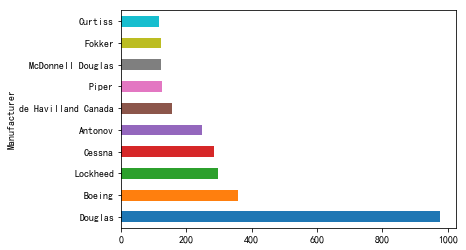

In [17]:
import re
#导出飞机制造商
def get_manufacturer(name):
    name = str(name).split(' ')
    result = name[0]
    for i in range(1, len(name)):
        if bool(re.search('[\dI]', name[i])):
            break;
        result = result + ' ' + name[i]
    return result
#按制造商聚合数据并排序
crash['Manufacturer'] = crash['Type'].apply(get_manufacturer)
crash.groupby('Manufacturer')['Operator'].count().sort_values(ascending=False)[:10].plot(kind='barh')